# Edge operators
### Dr. Tirthajyoti Sarkar, Fremont CA 94536
Edge operators are used in image processing within edge detection algorithms. They are discrete differentiation operators, computing an approximation of the gradient of the image intensity function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt

In [2]:
image = camera()
edge_roberts = roberts(image)
edge_sobel = sobel(image)

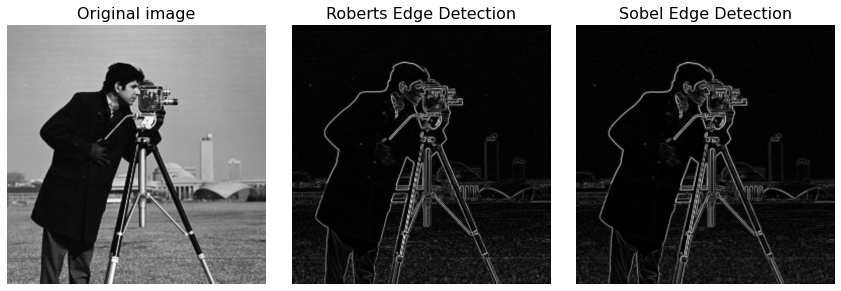

In [3]:
fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(12, 4))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image',fontsize=16)

ax[1].imshow(edge_roberts, cmap=plt.cm.gray)
ax[1].set_title('Roberts Edge Detection',fontsize=16)

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title('Sobel Edge Detection',fontsize=16)

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

### Showing difference between edge operators
Different operators compute different finite-difference approximations of the gradient. For example, the Scharr filter results in a less rotational variance than the Sobel filter that is in turn better than the Prewitt filter. 

The difference between the Prewitt and Sobel filters and the Scharr filter is illustrated below with an image that is the discretization of a rotation- invariant continuous function. 

The discrepancy between the Prewitt and Sobel filters, and the Scharr filter is stronger for regions of the image where the direction of the gradient is close to diagonal, and for regions with high spatial frequencies. 

For the example image the differences between the filter results are very small and the filter results are visually almost indistinguishable.

### Rotation-invariant image with different spatial frequencies

In [4]:
x, y = np.ogrid[:100, :100]
img = np.exp(1j * np.hypot(x, y)**1.3 / 20.).real

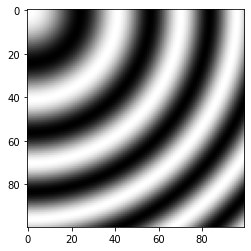

In [5]:
plt.imshow(img,cmap=plt.cm.gray)
plt.show()

In [6]:
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

### Differential filters

In [7]:
diff_scharr_prewitt = edge_scharr - edge_prewitt
diff_scharr_sobel = edge_scharr - edge_sobel
max_diff = np.max(np.maximum(diff_scharr_prewitt, diff_scharr_sobel))

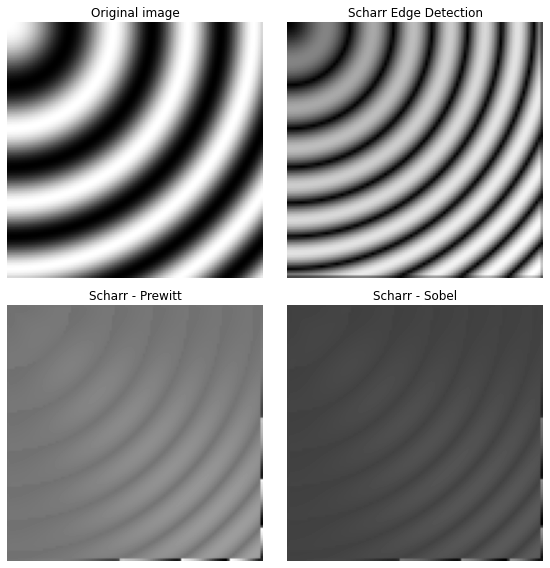

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_scharr, cmap=plt.cm.gray)
ax[1].set_title('Scharr Edge Detection')

ax[2].imshow(diff_scharr_prewitt, cmap=plt.cm.gray, vmax=max_diff)
ax[2].set_title('Scharr - Prewitt')

ax[3].imshow(diff_scharr_sobel, cmap=plt.cm.gray, vmax=max_diff)
ax[3].set_title('Scharr - Sobel')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()